In [1]:
import cv2
import numpy as np
from skimage import color
import matplotlib.pyplot as plt

In [ ]:
# Load image from file path and simulate imfrombytes
def load_and_prepare_image(path):
    # Step 1: Load with OpenCV (BGR by default)
    img_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
    if img_bgr is None:
        raise FileNotFoundError(f"Cannot load image from path: {path}")

    # Step 2: Convert to float32 and normalize to [0, 1]
    img_bgr = img_bgr.astype(np.float32) / 255.0

    # Step 3: Convert BGR to RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    return img_rgb

# Convert RGB to Lab and split into channels
def rgb2lab_split(img_rgb):
    img_lab = color.rgb2lab(img_rgb)
    img_l = img_lab[:, :, :1]   # L channel
    img_ab = img_lab[:, :, 1:]  # a and b channels
    return img_l, img_ab

# Convert Lab-L channel to uint8 for OpenCV display
def lab_l_to_uint8(img_l):
    """Convert Lab L channel [0, 100] float64 -> uint8 [0, 255]"""
    img_l_gray = img_l[:, :, 0]  # shape (H, W)
    img_l_uint8 = (img_l_gray / 100.0 * 255).astype(np.uint8)
    return img_l_uint8

# Convert displayed uint8 L channel back to Lab format
def uint8_to_lab_l(img_l_uint8):
    """Convert uint8 [0, 255] -> Lab L channel float64 [0, 100], shape (H, W, 1)"""
    img_l_gray = (img_l_uint8.astype(np.float64) / 255.0) * 100.0
    return img_l_gray[:, :, np.newaxis]  # shape (H, W, 1)

def brighten_lab_l(img_l, factor=1.2):
    """Brighten L channel by scaling. Values clipped to [0, 100]."""
    img_l_bright = img_l * factor
    img_l_bright = np.clip(img_l_bright, 0, 100)
    return img_l_bright

def brighten_rgb(img_rgb, factor=1.2):
    """Brighten RGB float32 image. Values clipped to [0, 1]."""
    img_bright = img_rgb * factor
    img_bright = np.clip(img_bright, 0.0, 1.0)
    return img_bright

def brighten_uint8(img, amount=30):
    """Add brightness to uint8 image. Clipped to [0, 255]."""
    img_bright = cv2.add(img, np.full_like(img, amount))
    return img_bright



In [42]:
# Convert Lab-L channel to uint8 for OpenCV display
def lab_l_to_uint8(img_l):
    """Convert Lab L channel [0, 100] float64 -> uint8 [0, 255]"""
    img_l_gray = img_l[:, :, 0]  # shape (H, W)
    img_l_uint8 = (img_l_gray / 100.0 * 255).astype(np.uint8)
    return img_l_uint8

# Convert displayed uint8 L channel back to Lab format
def uint8_to_lab_l(img_l_uint8):
    """Convert uint8 [0, 255] -> Lab L channel float64 [0, 100], shape (H, W, 1)"""
    img_l_gray = (img_l_uint8.astype(np.float64) / 255.0) * 100.0
    return img_l_gray[:, :, np.newaxis]  # shape (H, W, 1)

def brighten_lab_l(img_l, factor=1.2):
    """Brighten L channel by scaling. Values clipped to [0, 100]."""
    img_l_bright = img_l * factor
    img_l_bright = np.clip(img_l_bright, 0, 100)
    return img_l_bright

def brighten_rgb(img_rgb, factor=1.2):
    """Brighten RGB float32 image. Values clipped to [0, 1]."""
    img_bright = img_rgb * factor
    img_bright = np.clip(img_bright, 0.0, 1.0)
    return img_bright

def brighten_uint8(img, amount=30):
    """Add brightness to uint8 image. Clipped to [0, 255]."""
    img_bright = cv2.add(img, np.full_like(img, amount))
    return img_bright

def outline_img(img_l_cv2, threshold=127, threshold_replace=255, thickness=1):
    _, img_l_cv2 = cv2.threshold(img_l_cv2, threshold, threshold_replace, cv2.THRESH_BINARY)
    _, thresh = cv2.threshold(img_l_cv2, 127, 255, 0)

    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img_l_cv2, contours, -1, 0, thickness=thickness)

    return img_l_cv2

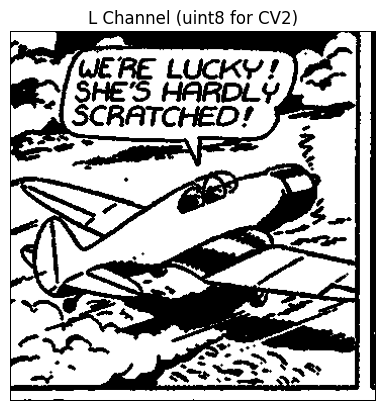

In [ ]:
# ---------------------- Example usage ----------------------

# Replace this with your image path
image_path = 'test_img\\3.jpg'

threshold_replace = 255
threshold = 175
brightness_factor = 1.8
outline_thickness = 1
# Load and process
img_rgb = load_and_prepare_image(image_path)
img_l, img_ab = rgb2lab_split(img_rgb)
img_l = brighten_lab_l(img_l, factor=brightness_factor)
img_l_cv2 = lab_l_to_uint8(img_l)

img_l_cv2 = outline_img(img_l_cv2, threshold=threshold, threshold_replace=threshold_replace, thickness=outline_thickness)

img_l = uint8_to_lab_l(img_l_cv2)


# Show L channel using OpenCV (or comment this out in Jupyter)
#cv2.imshow('L channel', img_l_cv2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Show L channel using matplotlib in Jupyter
plt.imshow(img_l_cv2, cmap='gray')
plt.title('L Channel (uint8 for CV2)')
plt.axis('off')
plt.show()